Second iteration of using kernels for time series.

In [1]:
import numpy as np
from data_fns import noisy_sin_signal, data_matrix, butter_bandpass_filter
from estimator import RFClassifier, relu, sigmoid
import matplotlib.pyplot as plt

In [2]:
def bp_weights(M, N, lowcut, highcut, fs):
    J = np.random.randn(M, N)
    J = butter_bandpass_filter(J, lowcut, highcut, fs)
    return J.T

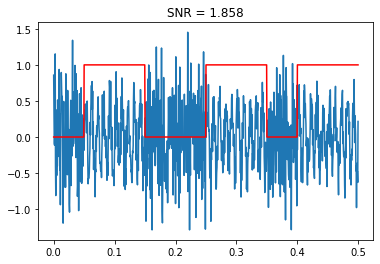

In [4]:
# generate data
f_s = 2000
dur = 10
f_sig = 100
sig_dur = 0.05
a = 0.9

# neuron memory
delta = 0.08
N = int(delta * f_s)

signal, label = noisy_sin_signal(f_s=f_s, dur=dur, f_signal=f_sig, sig_dur=sig_dur, a=a, seed=39)
X, y = data_matrix(signal, label, N)

# plot
t = np.arange(0, 10, 1/f_s)
snr = a ** 2/np.sqrt(1 - a ** 2)
fig = plt.figure()
plt.title('SNR = %0.3f' % snr)
plt.plot(t[:1000], signal[:1000])
plt.plot(t[:1000], label[:1000], 'r')
# plt.savefig('/Users/biraj/Desktop/noisy_sig.png')

In [6]:
# separate into train and test set
idx = int(len(X) * 2 / 3)
X_train, y_train = X[:idx], y[:idx]
X_test, y_test = X[idx:], y[idx:]

In [7]:
n_features = np.logspace(0, 4, 5, endpoint=False).astype(int)
print(n_features)

[   1    6   39  251 1584]


In [8]:
# linear classifier on the signal
err = []
for trial in range(3):
    print(trial)
    trial_err = []
    for a in np.arange(0, 1, 0.1):
        s = np.random.randint(1000)
        signal, label = noisy_sin_signal(f_s=f_s, dur=dur, f_signal=f_sig, sig_dur=sig_dur, a=a, seed=s)
        X, y = data_matrix(signal, label, N)

        idx = int(len(X) * 2 / 3)
        X_train, y_train = X[:idx], y[:idx]
        X_test, y_test = X[idx:], y[idx:]

        l_clf = RFClassifier(width=10, weights=None, nonlinearity=lambda x: x, weight_fun=None, seed=s)
        l_clf.fit(X_train, y_train)
        trial_err.append(1 - l_clf.score(X_test, y_test))
    err.append(trial_err)

0


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

1


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

2


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

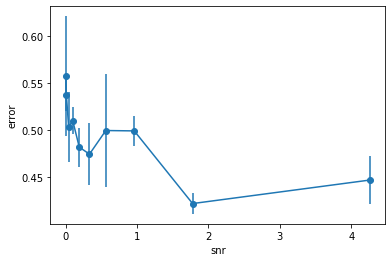

In [9]:
aa = np.arange(0, 1, 0.1)
ss2 = np.sqrt(1 - aa**2)

fig = plt.figure()
plt.errorbar((aa/ss2) ** 2 , np.mean(err, axis=0), yerr=np.std(err, axis=0), fmt='-o')
plt.xlabel('snr')
plt.ylabel('error')
plt.savefig('/Users/biraj/Desktop/l_classf.png')

In [ ]:
np.std(err, axis=0)

In [ ]:
# Linear classifier on the signal with unimodal features
u_err_mean = []
u_err_std = []
for n in n_features:
    err = []
    for trial in range(5):
        print(n, trial)
        s = np.random.randint(1000)
        clf = RFClassifier(width=n, weights='unimodal', nonlinearity=relu, weight_fun=None, seed=s)
        clf.fit(X_train, y_train)
        err.append(1 - clf.score(X_test, y_test))
    u_err_mean.append(np.mean(err))
    u_err_std.append(np.std(err))

In [ ]:
# Linear classifier on the signal with white noise features
wn_err_mean = []
wn_err_std = []
for n in n_features:
    err = []
    for trial in range(5):
        print(n, trial)
        s = np.random.randint(1000)
        clf = RFClassifier(width=n, weights='white noise', nonlinearity=relu, weight_fun=None, seed=s)
        clf.fit(X_train, y_train)
        err.append(1 - clf.score(X_test, y_test))
    wn_err_mean.append(np.mean(err))
    wn_err_std.append(np.std(err))

In [ ]:
# Linear classifier on the signal with band pass features
f = lambda M, N: bp_weights(M, N, lowcut=90, highcut=110, fs=f_s)

bp_err_mean = []
bp_err_std = []
for n in n_features:
    err = []
    for trial in range(5):
        print(n, trial)
        s = np.random.randint(1000)
        clf = RFClassifier(width=n, weights='band pass filter', nonlinearity=relu, weight_fun=f, seed=s)
        clf.fit(X_train, y_train)
        err.append(1 - clf.score(X_test, y_test))
    bp_err_mean.append(np.mean(err))
    bp_err_std.append(np.std(err))

In [ ]:
fig = plt.figure()
plt.title('Linear classification with random features')
plt.errorbar(n_features, u_err_mean, yerr=u_err_std, label='unimodal')
plt.errorbar(n_features, wn_err_mean, yerr=wn_err_std, label='white noise')
plt.errorbar(n_features, bp_err_mean, yerr=bp_err_std, label='bandpass')
plt.xlabel('n_samples')
plt.ylabel('error')
plt.legend()
plt.savefig('/Users/biraj/Desktop/rf_classf.png')